# EDA

In this notebook an EDA of the Kickstarter dataset will be performed.

For the purpose of a clean notebook, the detailed plotting functions are stored in the [EDA_plots.py](./EDA_plots.py) file.

## Import libraries & DataFrame

In [1]:
# --- import ---
import os, calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import EDA_plots as EDA

# plot styles
%matplotlib inline
sns.set_theme(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

# formating options & functions
def formatter(x, pos=0):
    return str(round(x / 1e6, pos)) + " mil." if x > 100000 else str(x)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# --- import dataframe ---
df = pd.read_csv(os.path.join('data', 'df_preprocessed.csv'))
for c in ['created_at', 'launched_at', 'deadline_at']:
    df[c] = pd.to_datetime(df[c])

# prepare some variables
num_feat = df.select_dtypes(include=['number']).columns.to_list()
cat_features = df.select_dtypes(exclude=['number']).columns.to_list()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214197 entries, 0 to 214196
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   backers_count      214197 non-null  int64         
 1   category           214197 non-null  object        
 2   country            214197 non-null  object        
 3   created_at         214197 non-null  datetime64[ns]
 4   launched_at        214197 non-null  datetime64[ns]
 5   staff_pick         214197 non-null  bool          
 6   state              214197 non-null  object        
 7   usd_pledged        214197 non-null  float64       
 8   deadline_at        214197 non-null  datetime64[ns]
 9   usd_goal           214197 non-null  float64       
 10  pledge_per_backer  199636 non-null  float64       
 11  name_length        214197 non-null  int64         
 12  blurb_length       214197 non-null  float64       
 13  preparation_days   214197 non-null  int64   

In [4]:
df.head(2)

,backers_count,category,country,created_at,launched_at,staff_pick,state,usd_pledged,deadline_at,usd_goal,pledge_per_backer,name_length,blurb_length,preparation_days,campaign_days,deadline_day,deadline_month,launch_day,launch_month,year
0,114,Music,US,2009-04-22 02:11:10,2009-05-01 15:44:25,True,successful,4100.60,2009-06-05 06:59:00,4000.00,35.97,9,22.00,10,35,Friday,June,Friday,May,2009
1,60,Journalism,US,2009-04-23 03:06:59,2009-11-19 21:43:15,False,successful,3425.00,2010-01-18 07:59:00,3000.00,57.08,10,19.00,211,59,Monday,January,Thursday,November,2010


## Timeseries

Let's plot some timeserie to get an overview of some characterstics of Kickstarter projects in general.

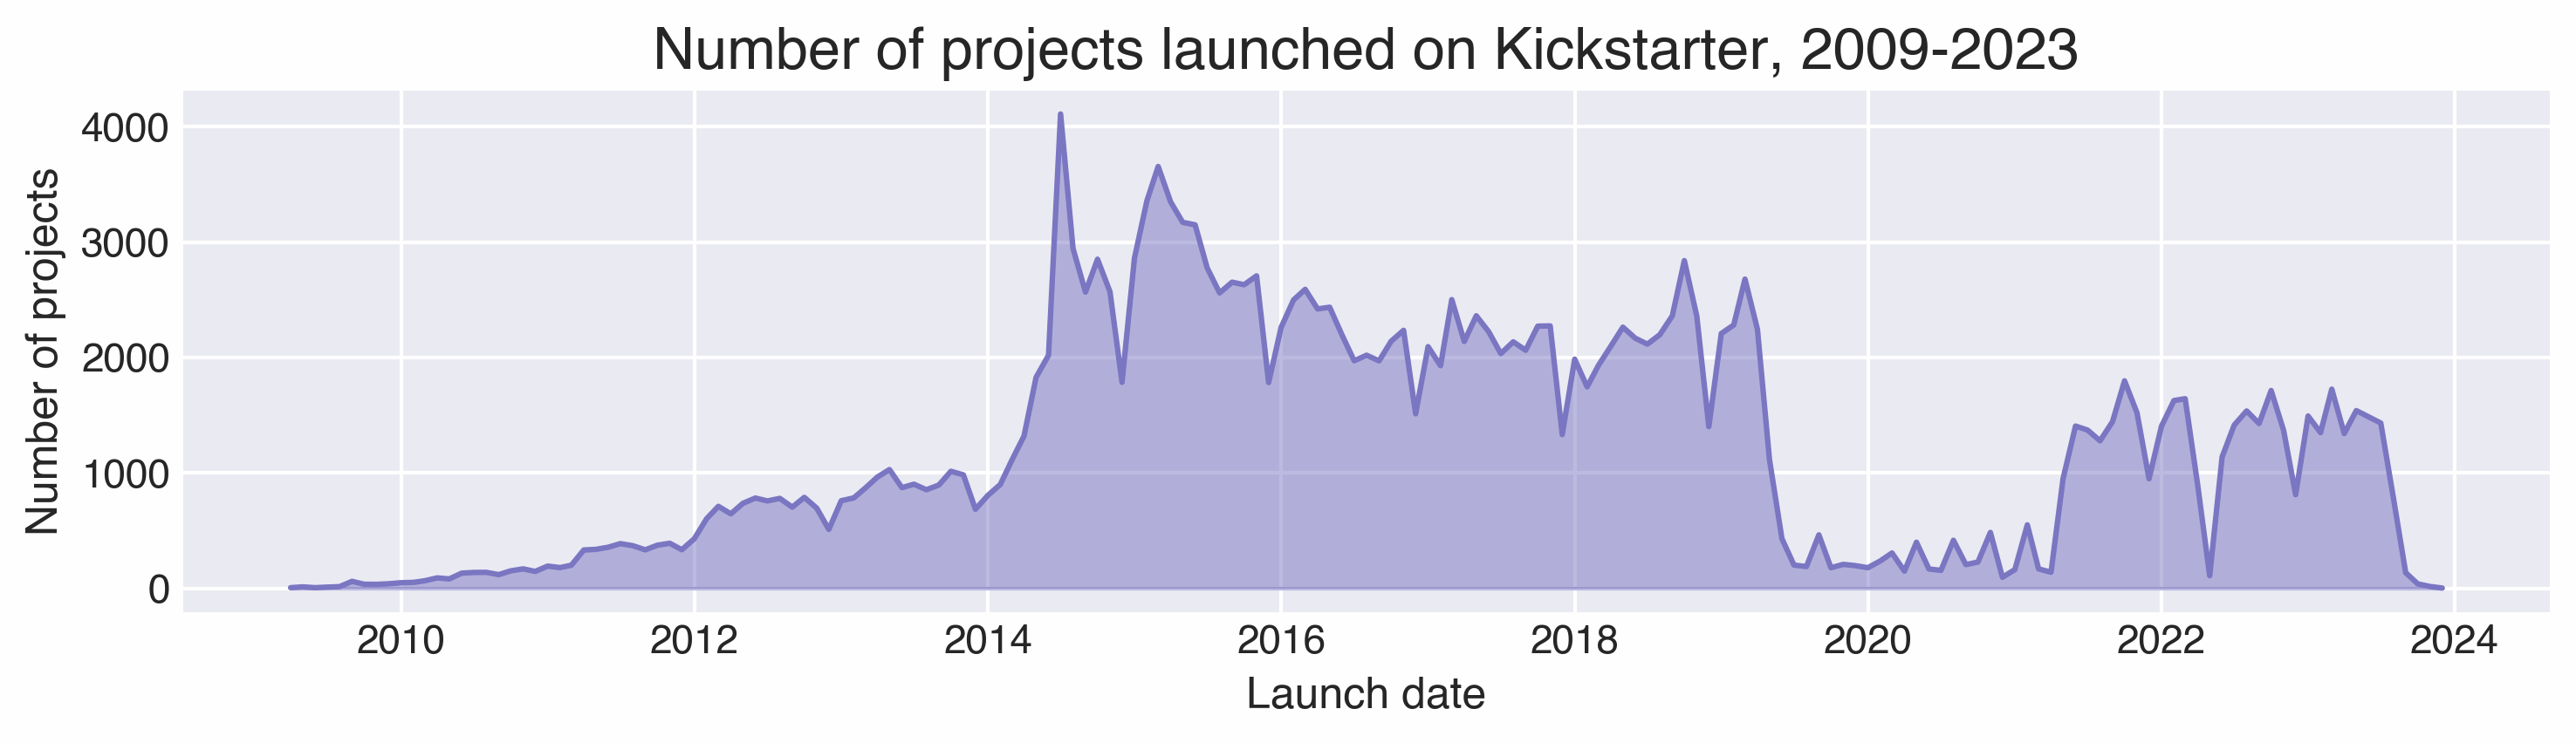

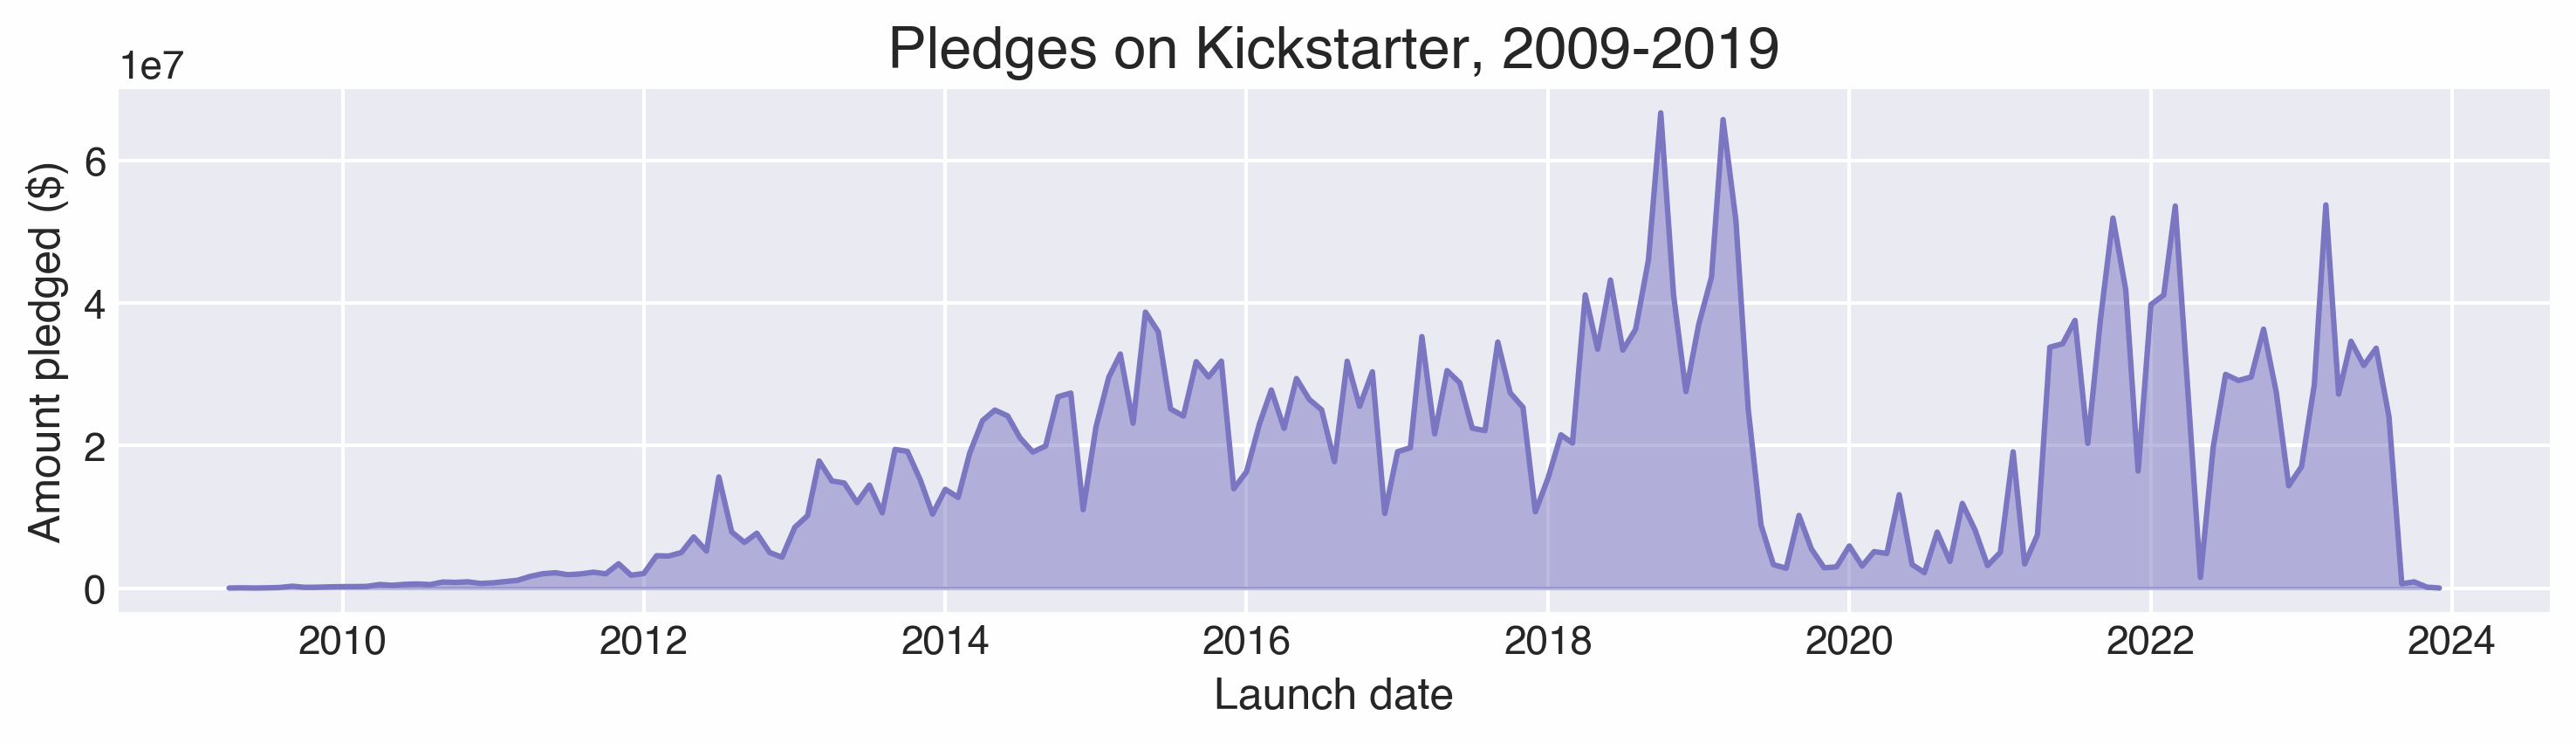

In [5]:
# --- plot timeries ---
EDA.timeseries(df);

## Successful vs. Failed

Let's ...

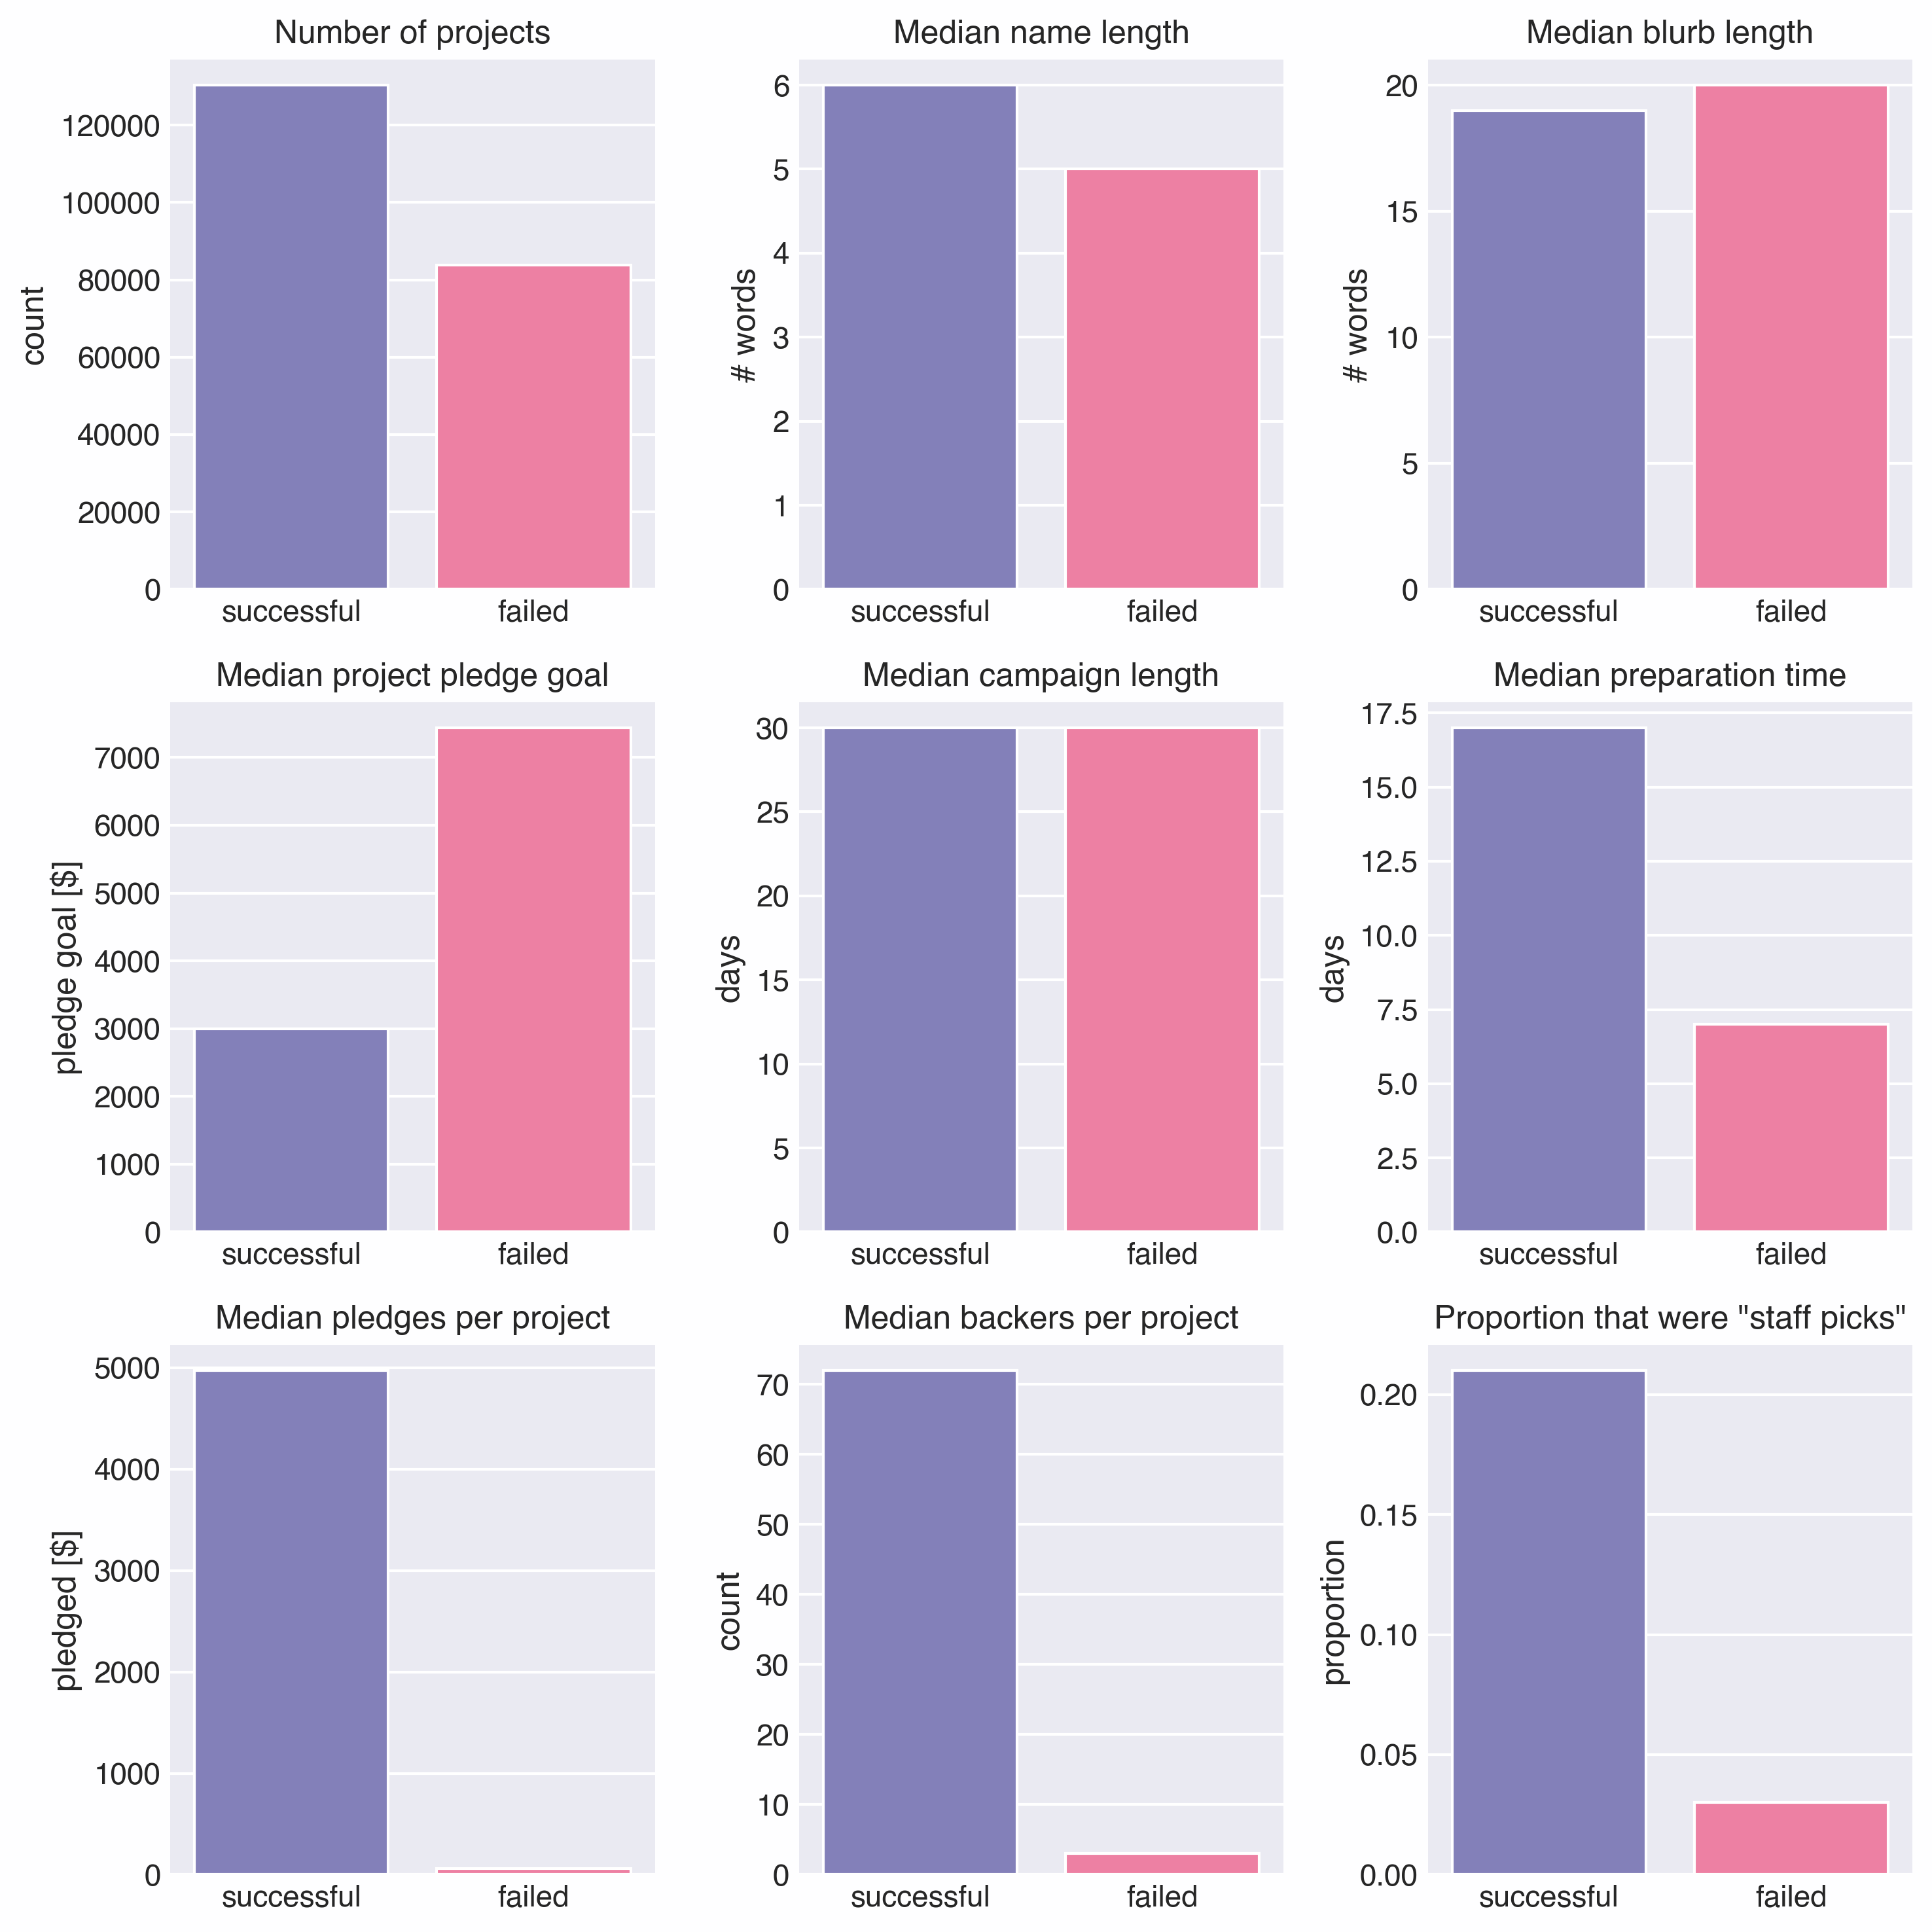

In [6]:
# --- plot some distributions ---
EDA.barplots(df);

there are differences between successful and failed project in some features...

## Look into distributions

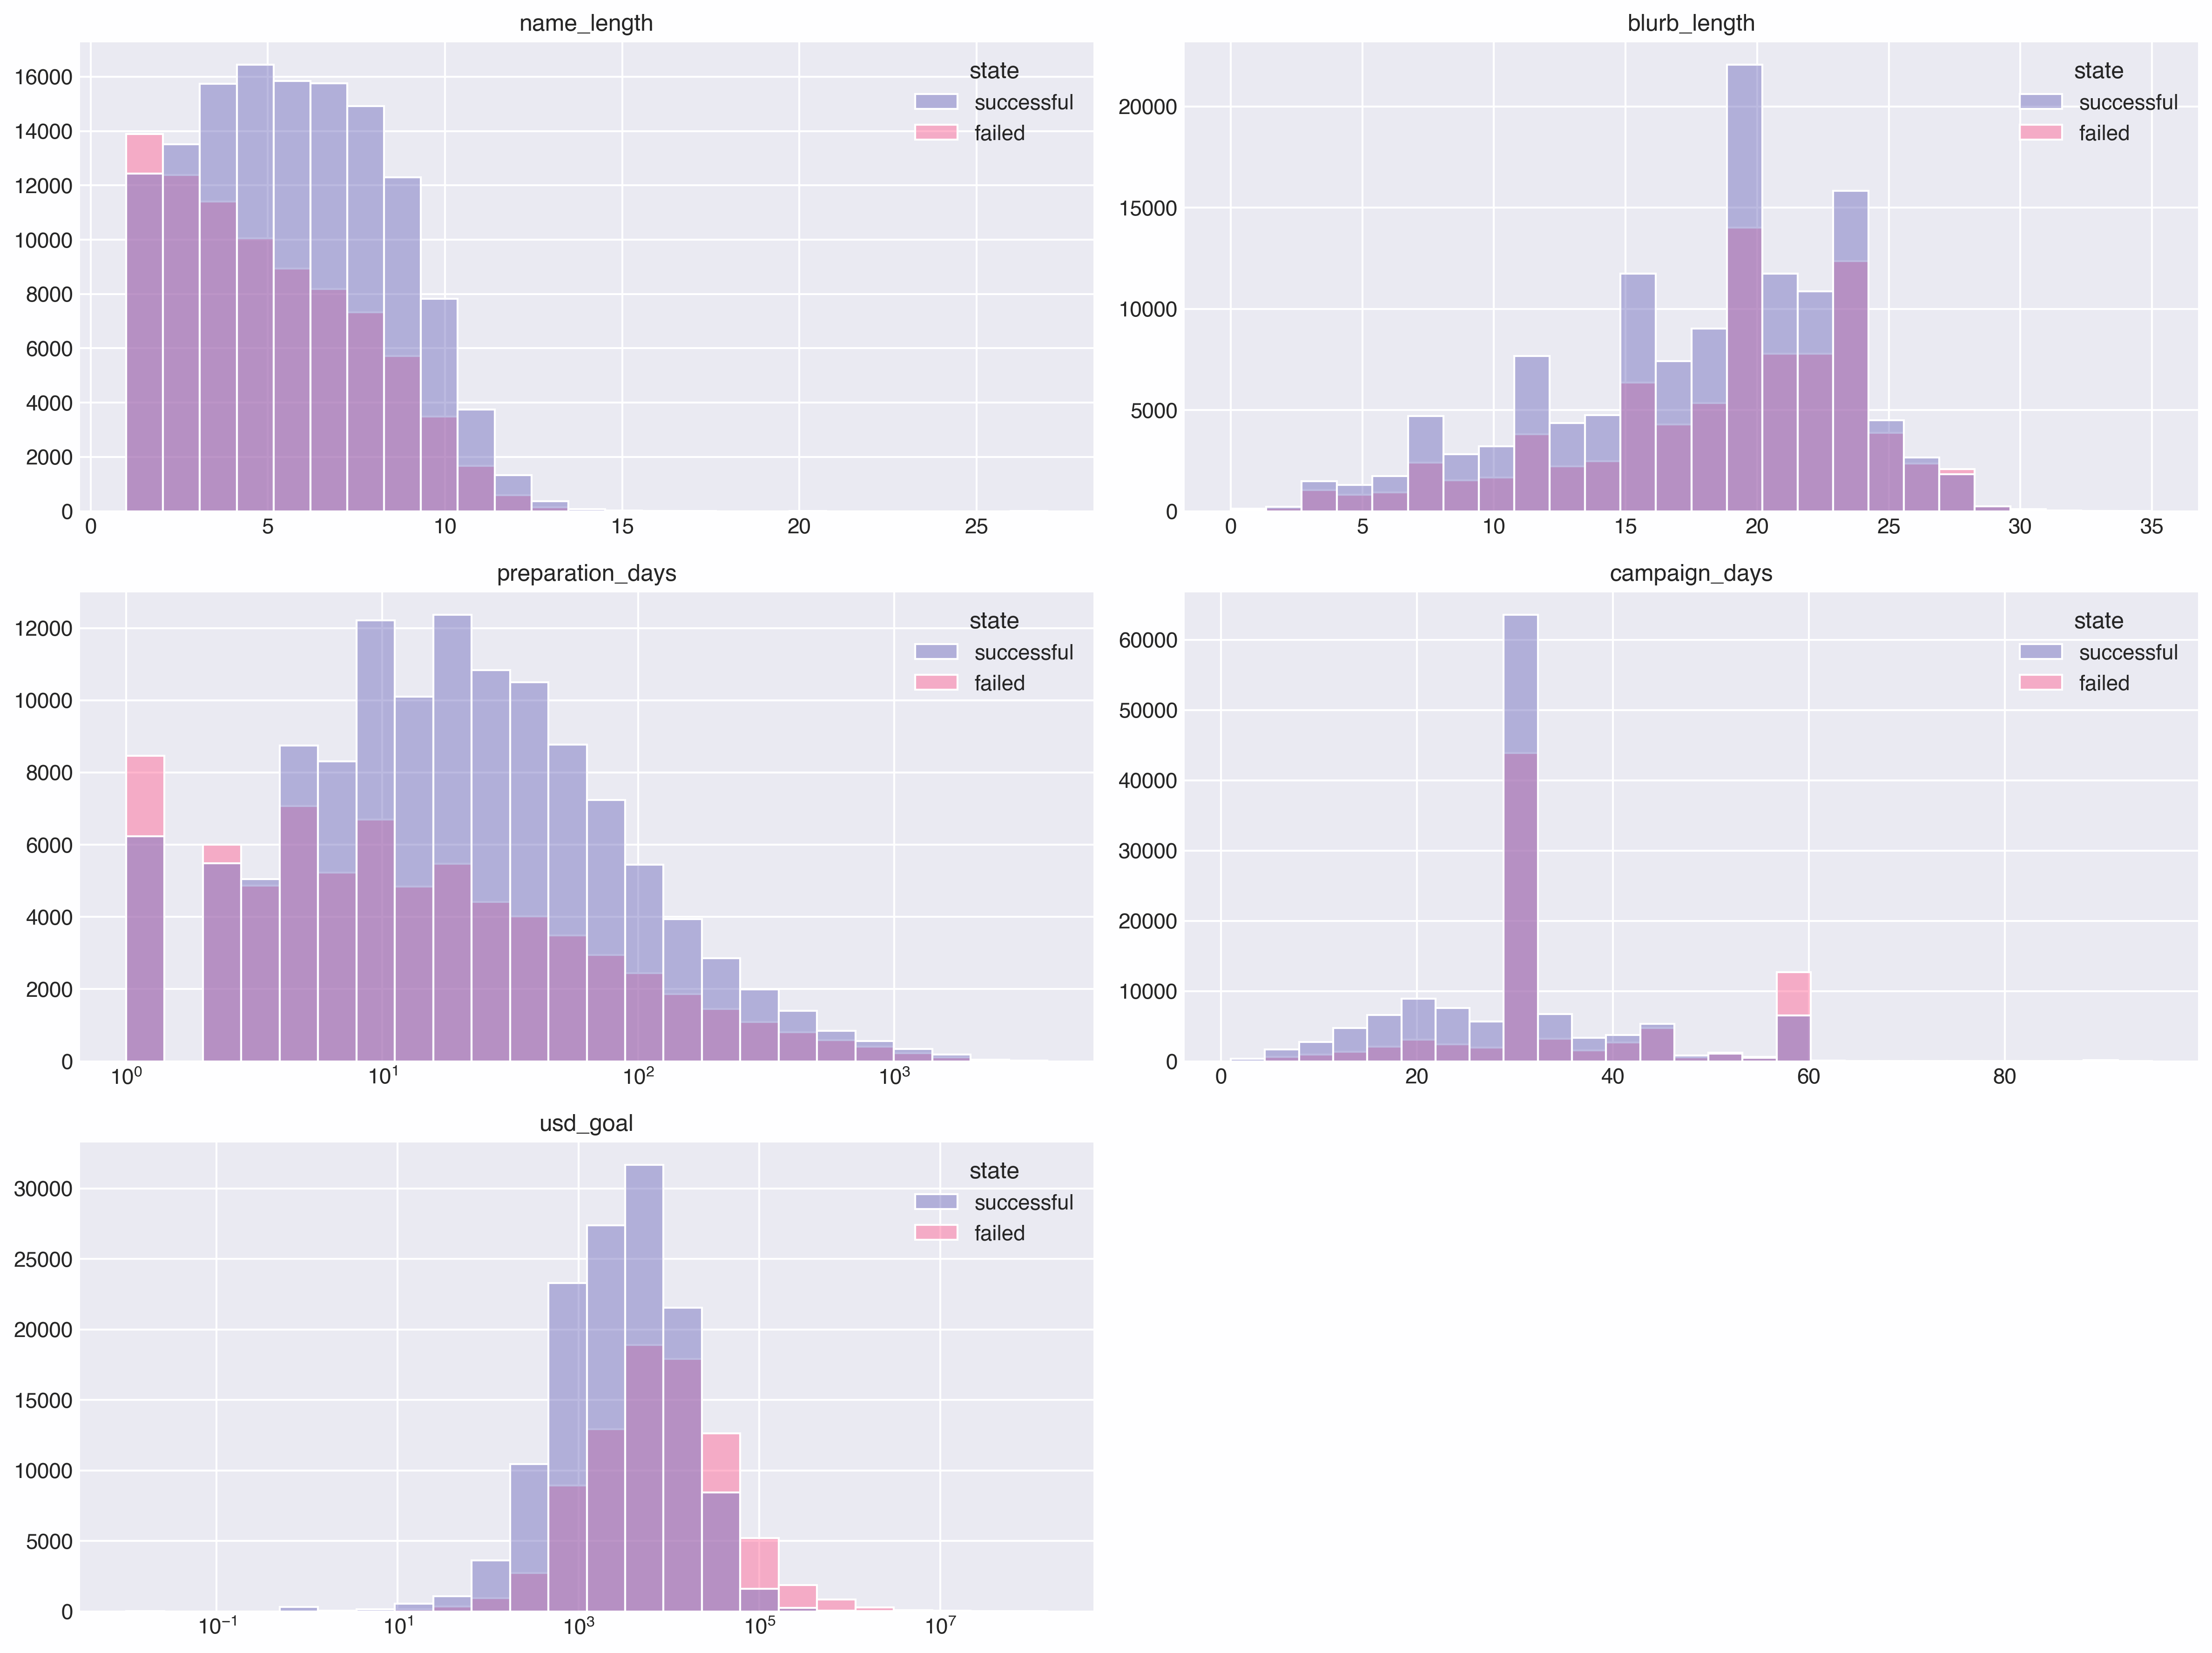

In [7]:
# --- histograms ---
EDA.histplots(df[['name_length', 'blurb_length', 'preparation_days', 'campaign_days', 'usd_goal', 'state']],
              hue='state', bins='doane', cols=2, xlog=[False, False, True, False, True])

clearly, some features separate between successful and failed projects...

## Feature depending distributions

Now, let's get a deeper understanding of some features, and how they are reflected in some metrics.

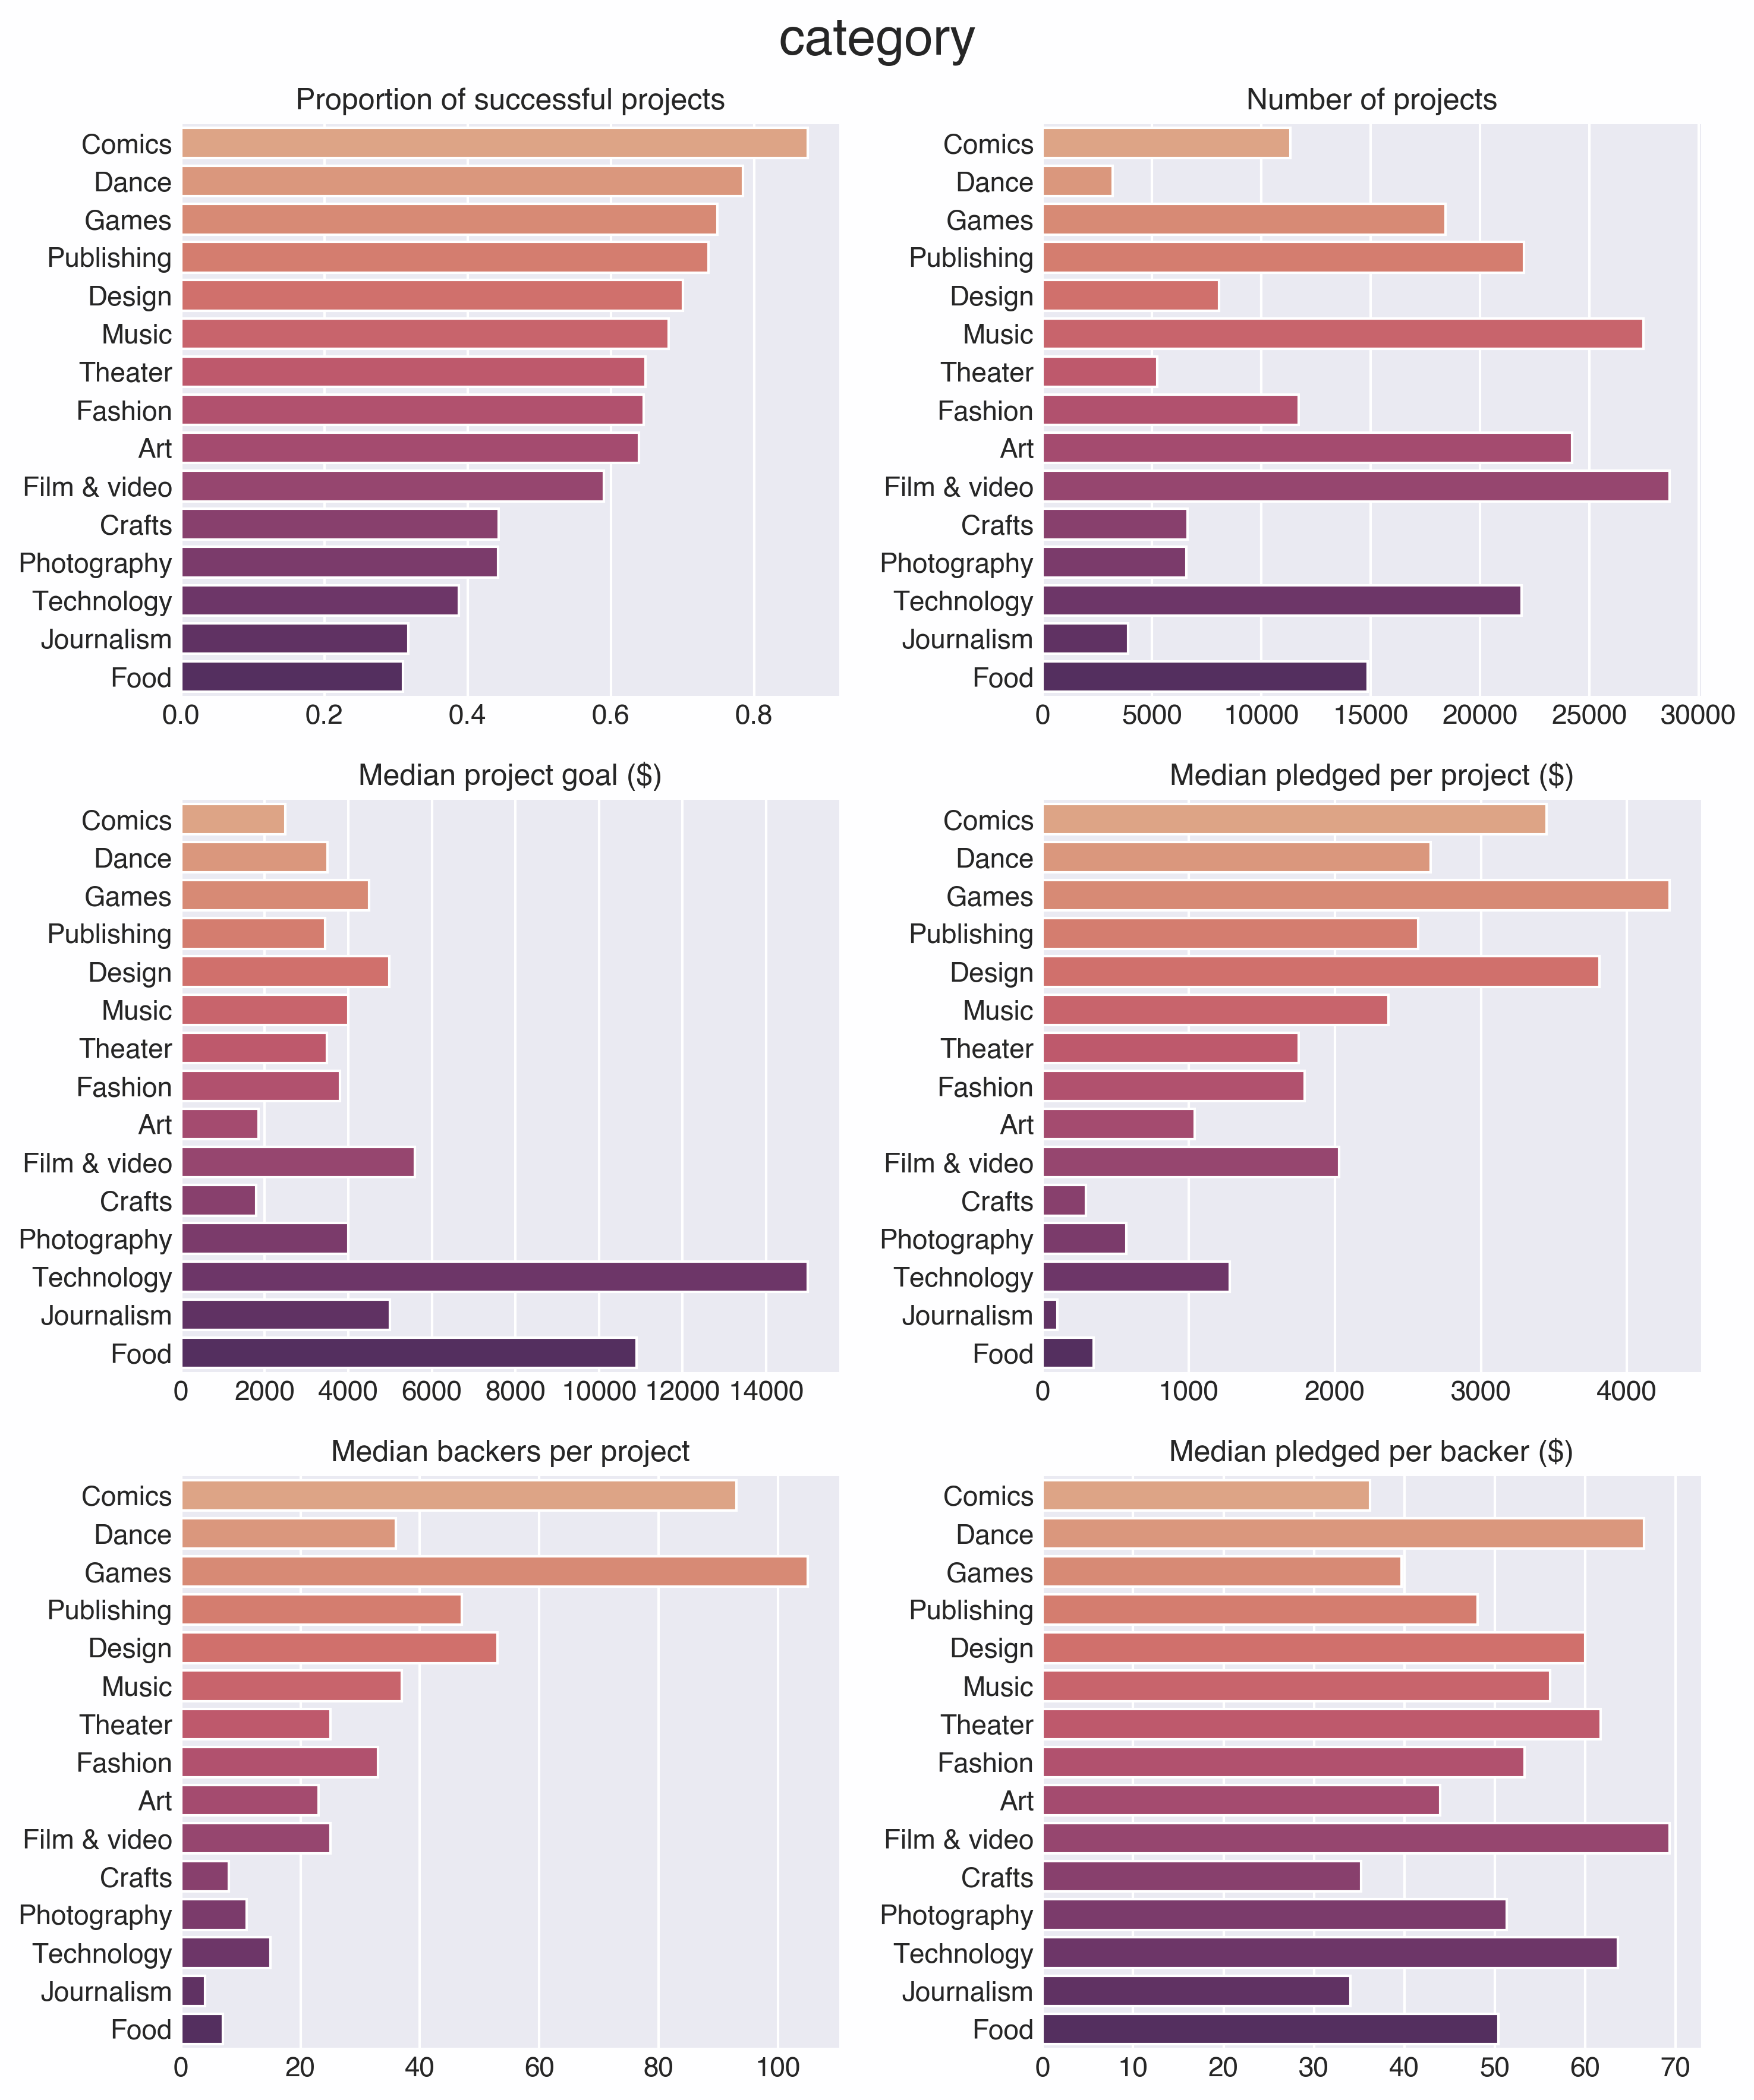

In [8]:
# --- 'category' ---
EDA.bar_by_feature(df, 'category', doSort='SuccessRate', palette='flare')

There is a huge variation in different metrics for different categories....

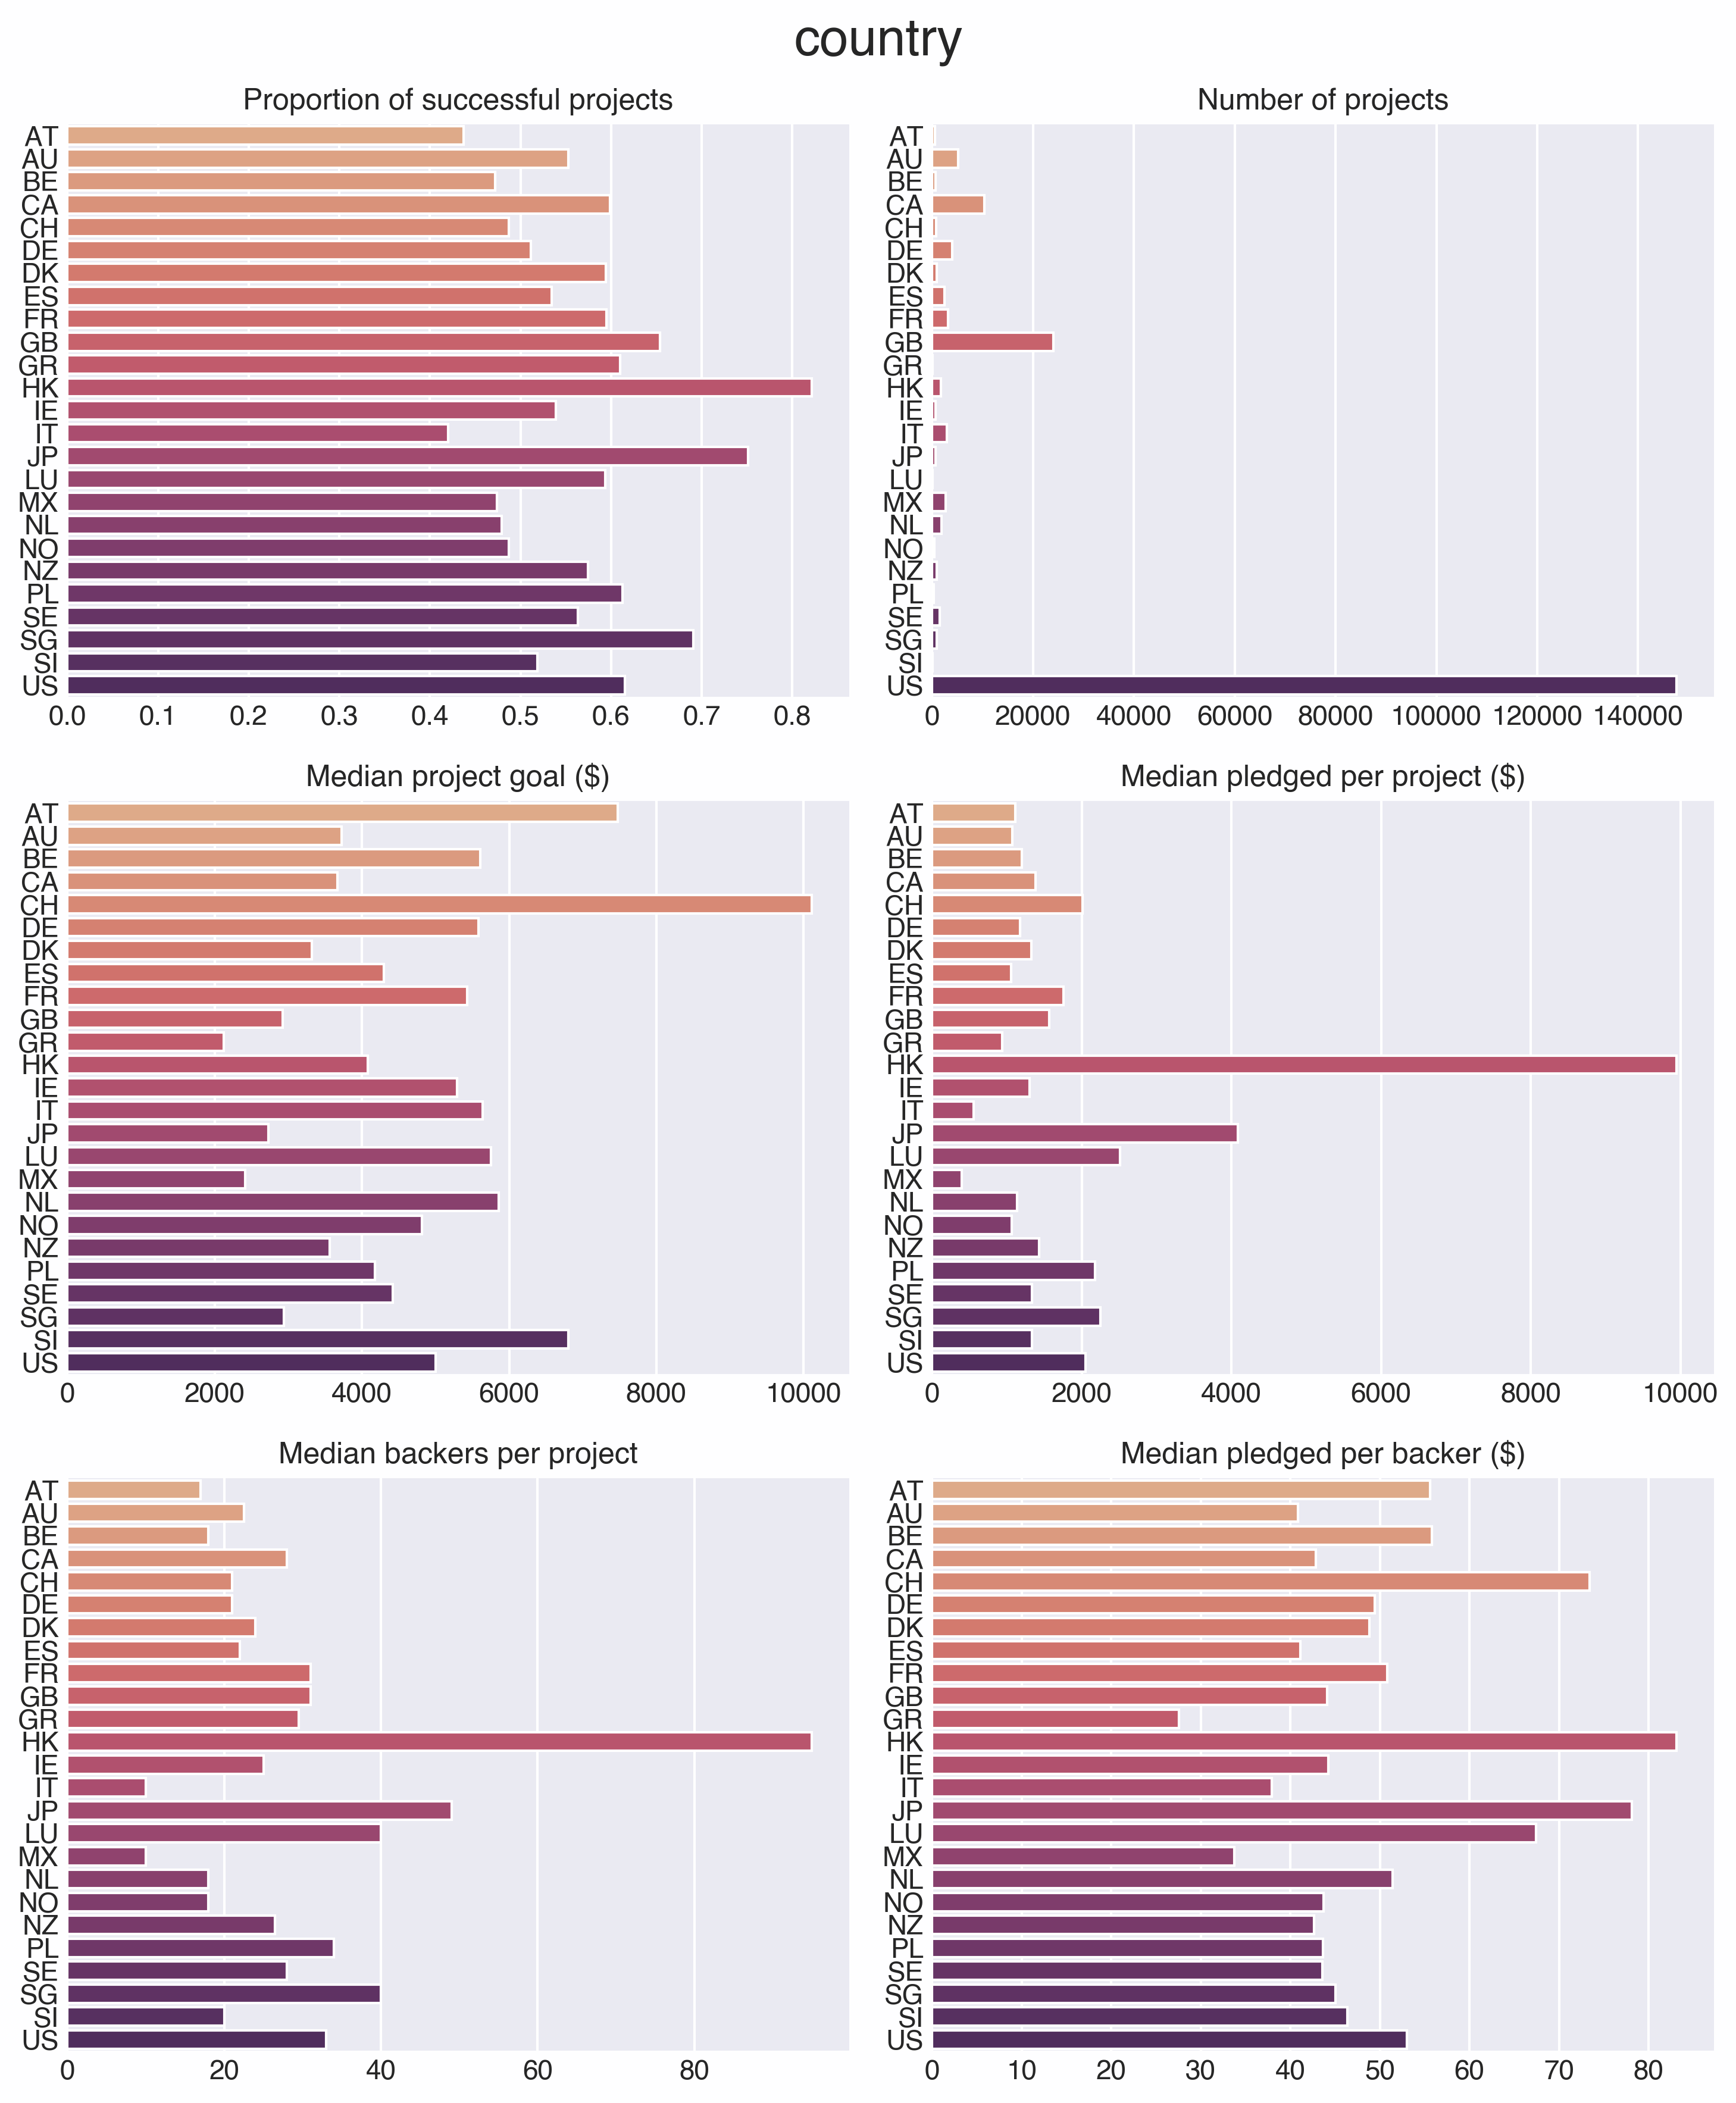

In [9]:
# --- 'country' ---
EDA.bar_by_feature(df, 'country', palette='flare')

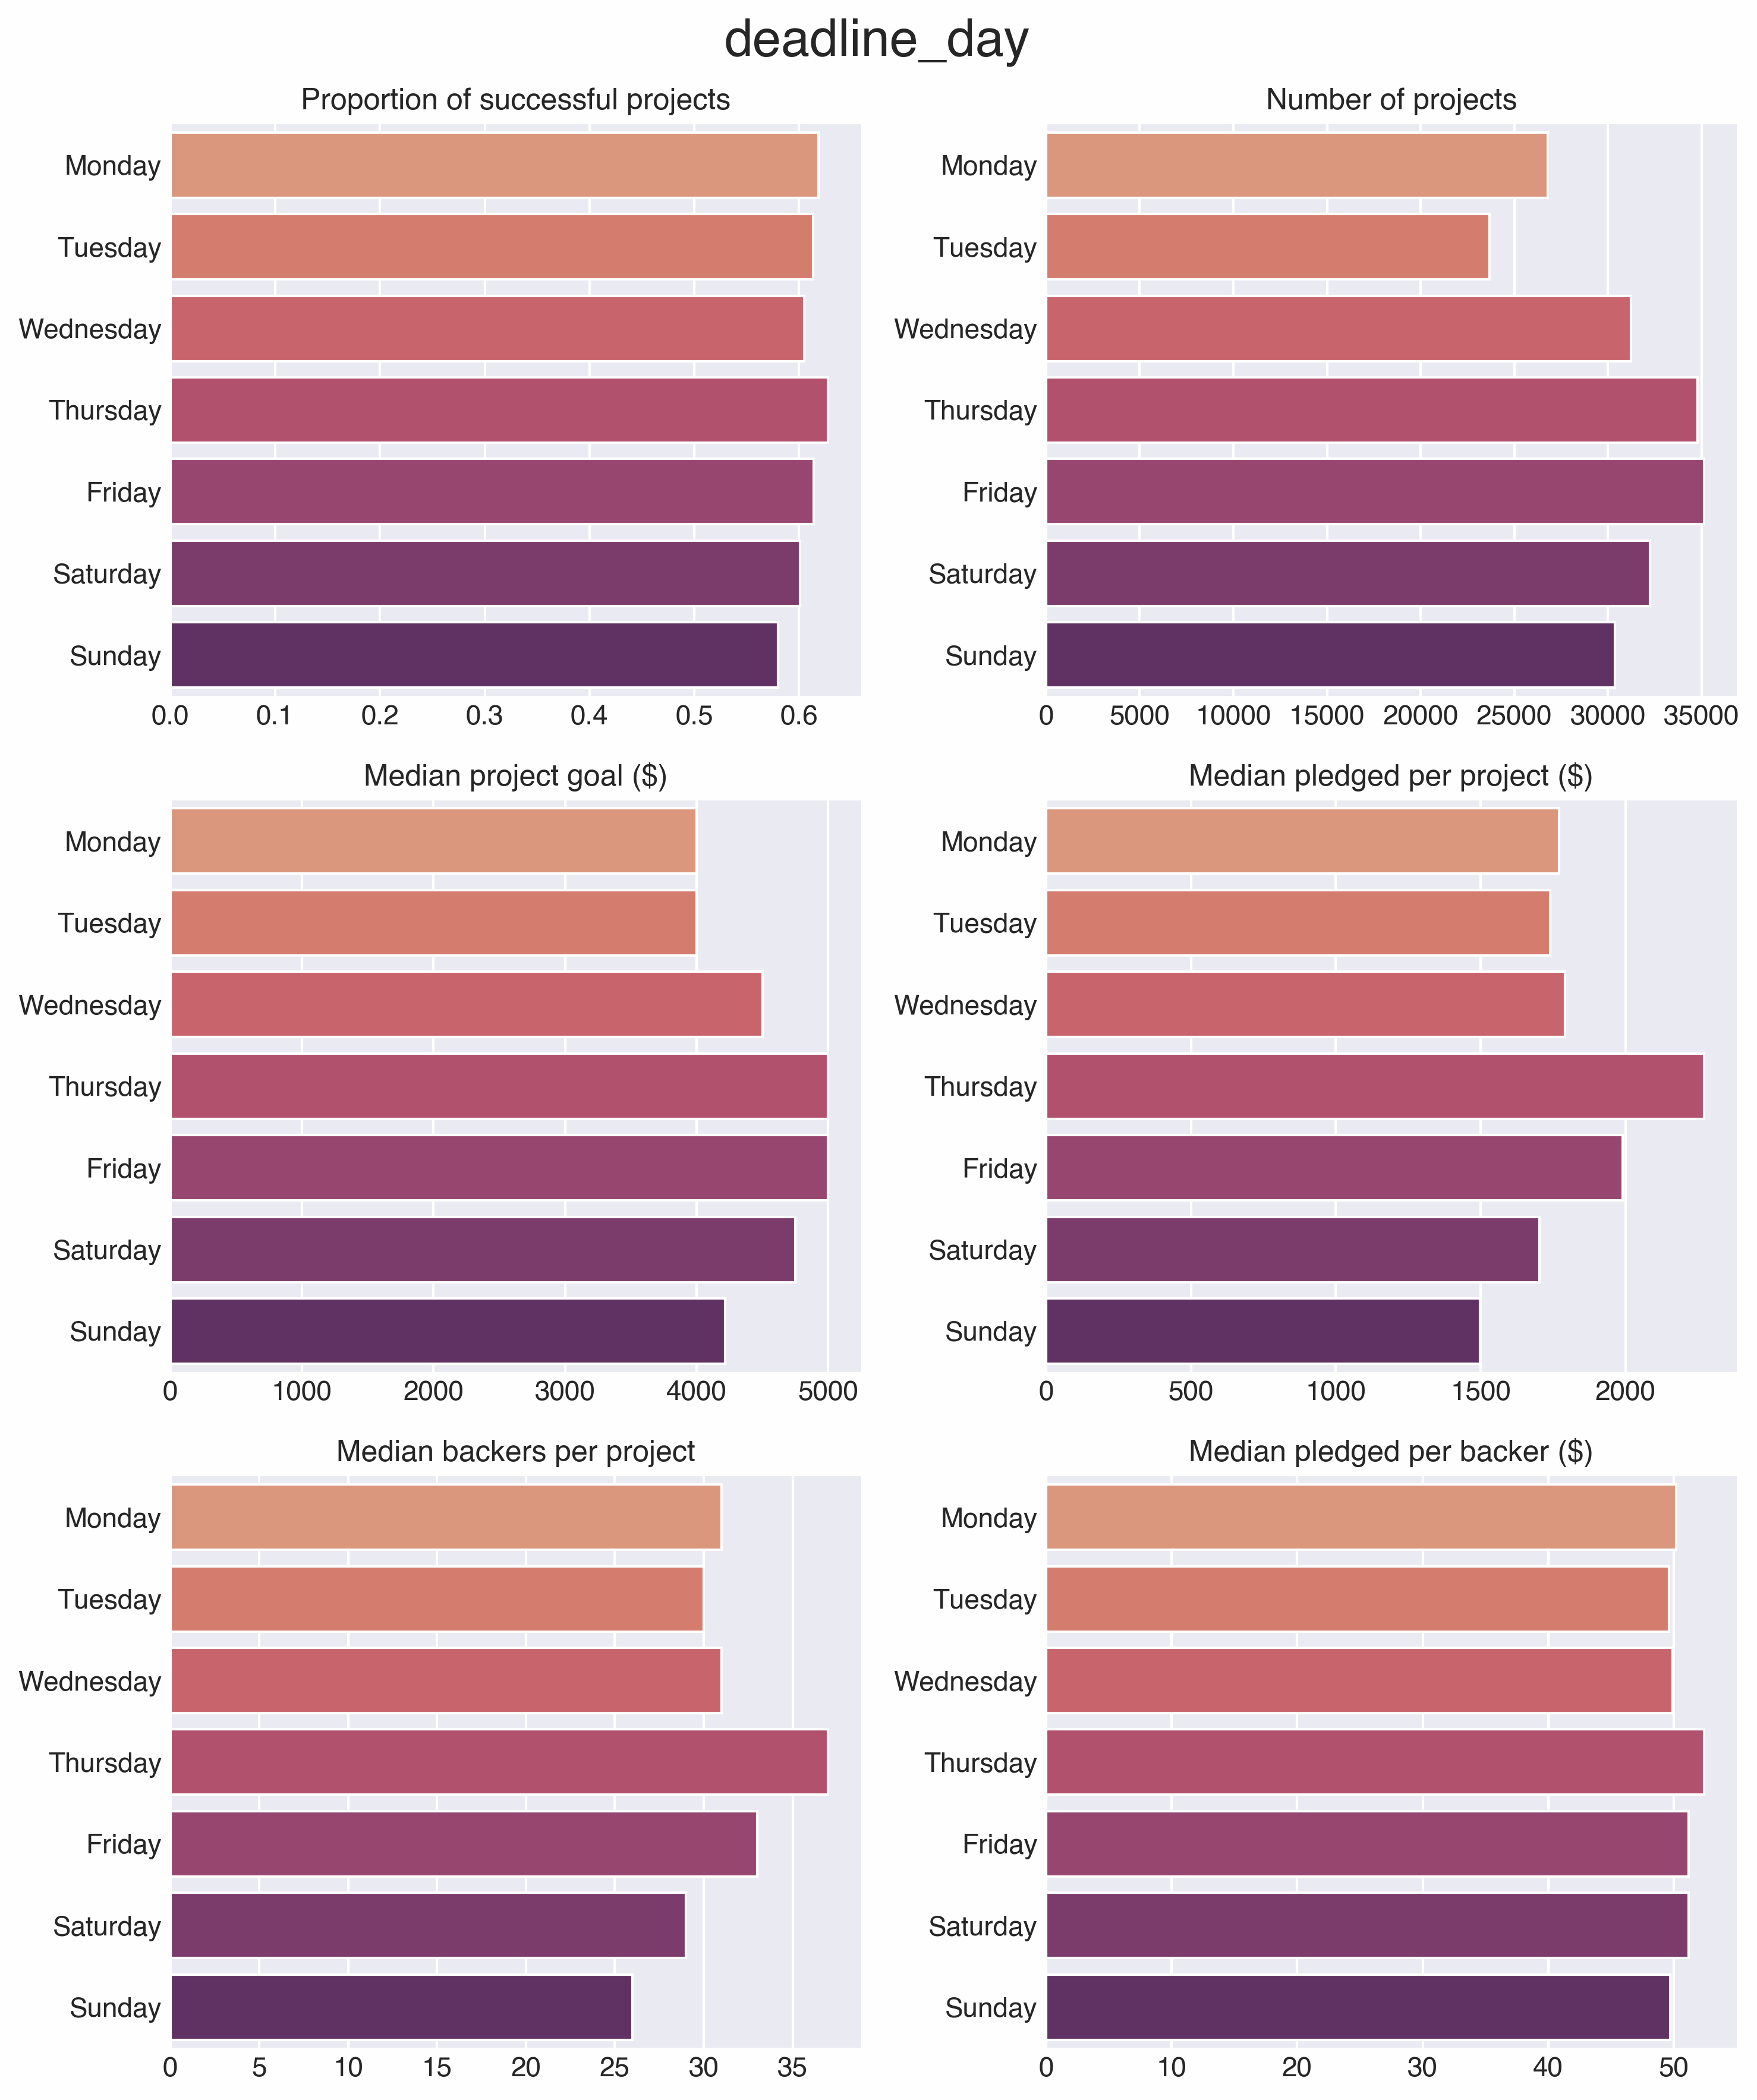

In [10]:
# --- 'deadline day' ---
EDA.bar_by_feature(df, 'deadline_day', doSort = list(calendar.day_name)[0:], palette='flare')

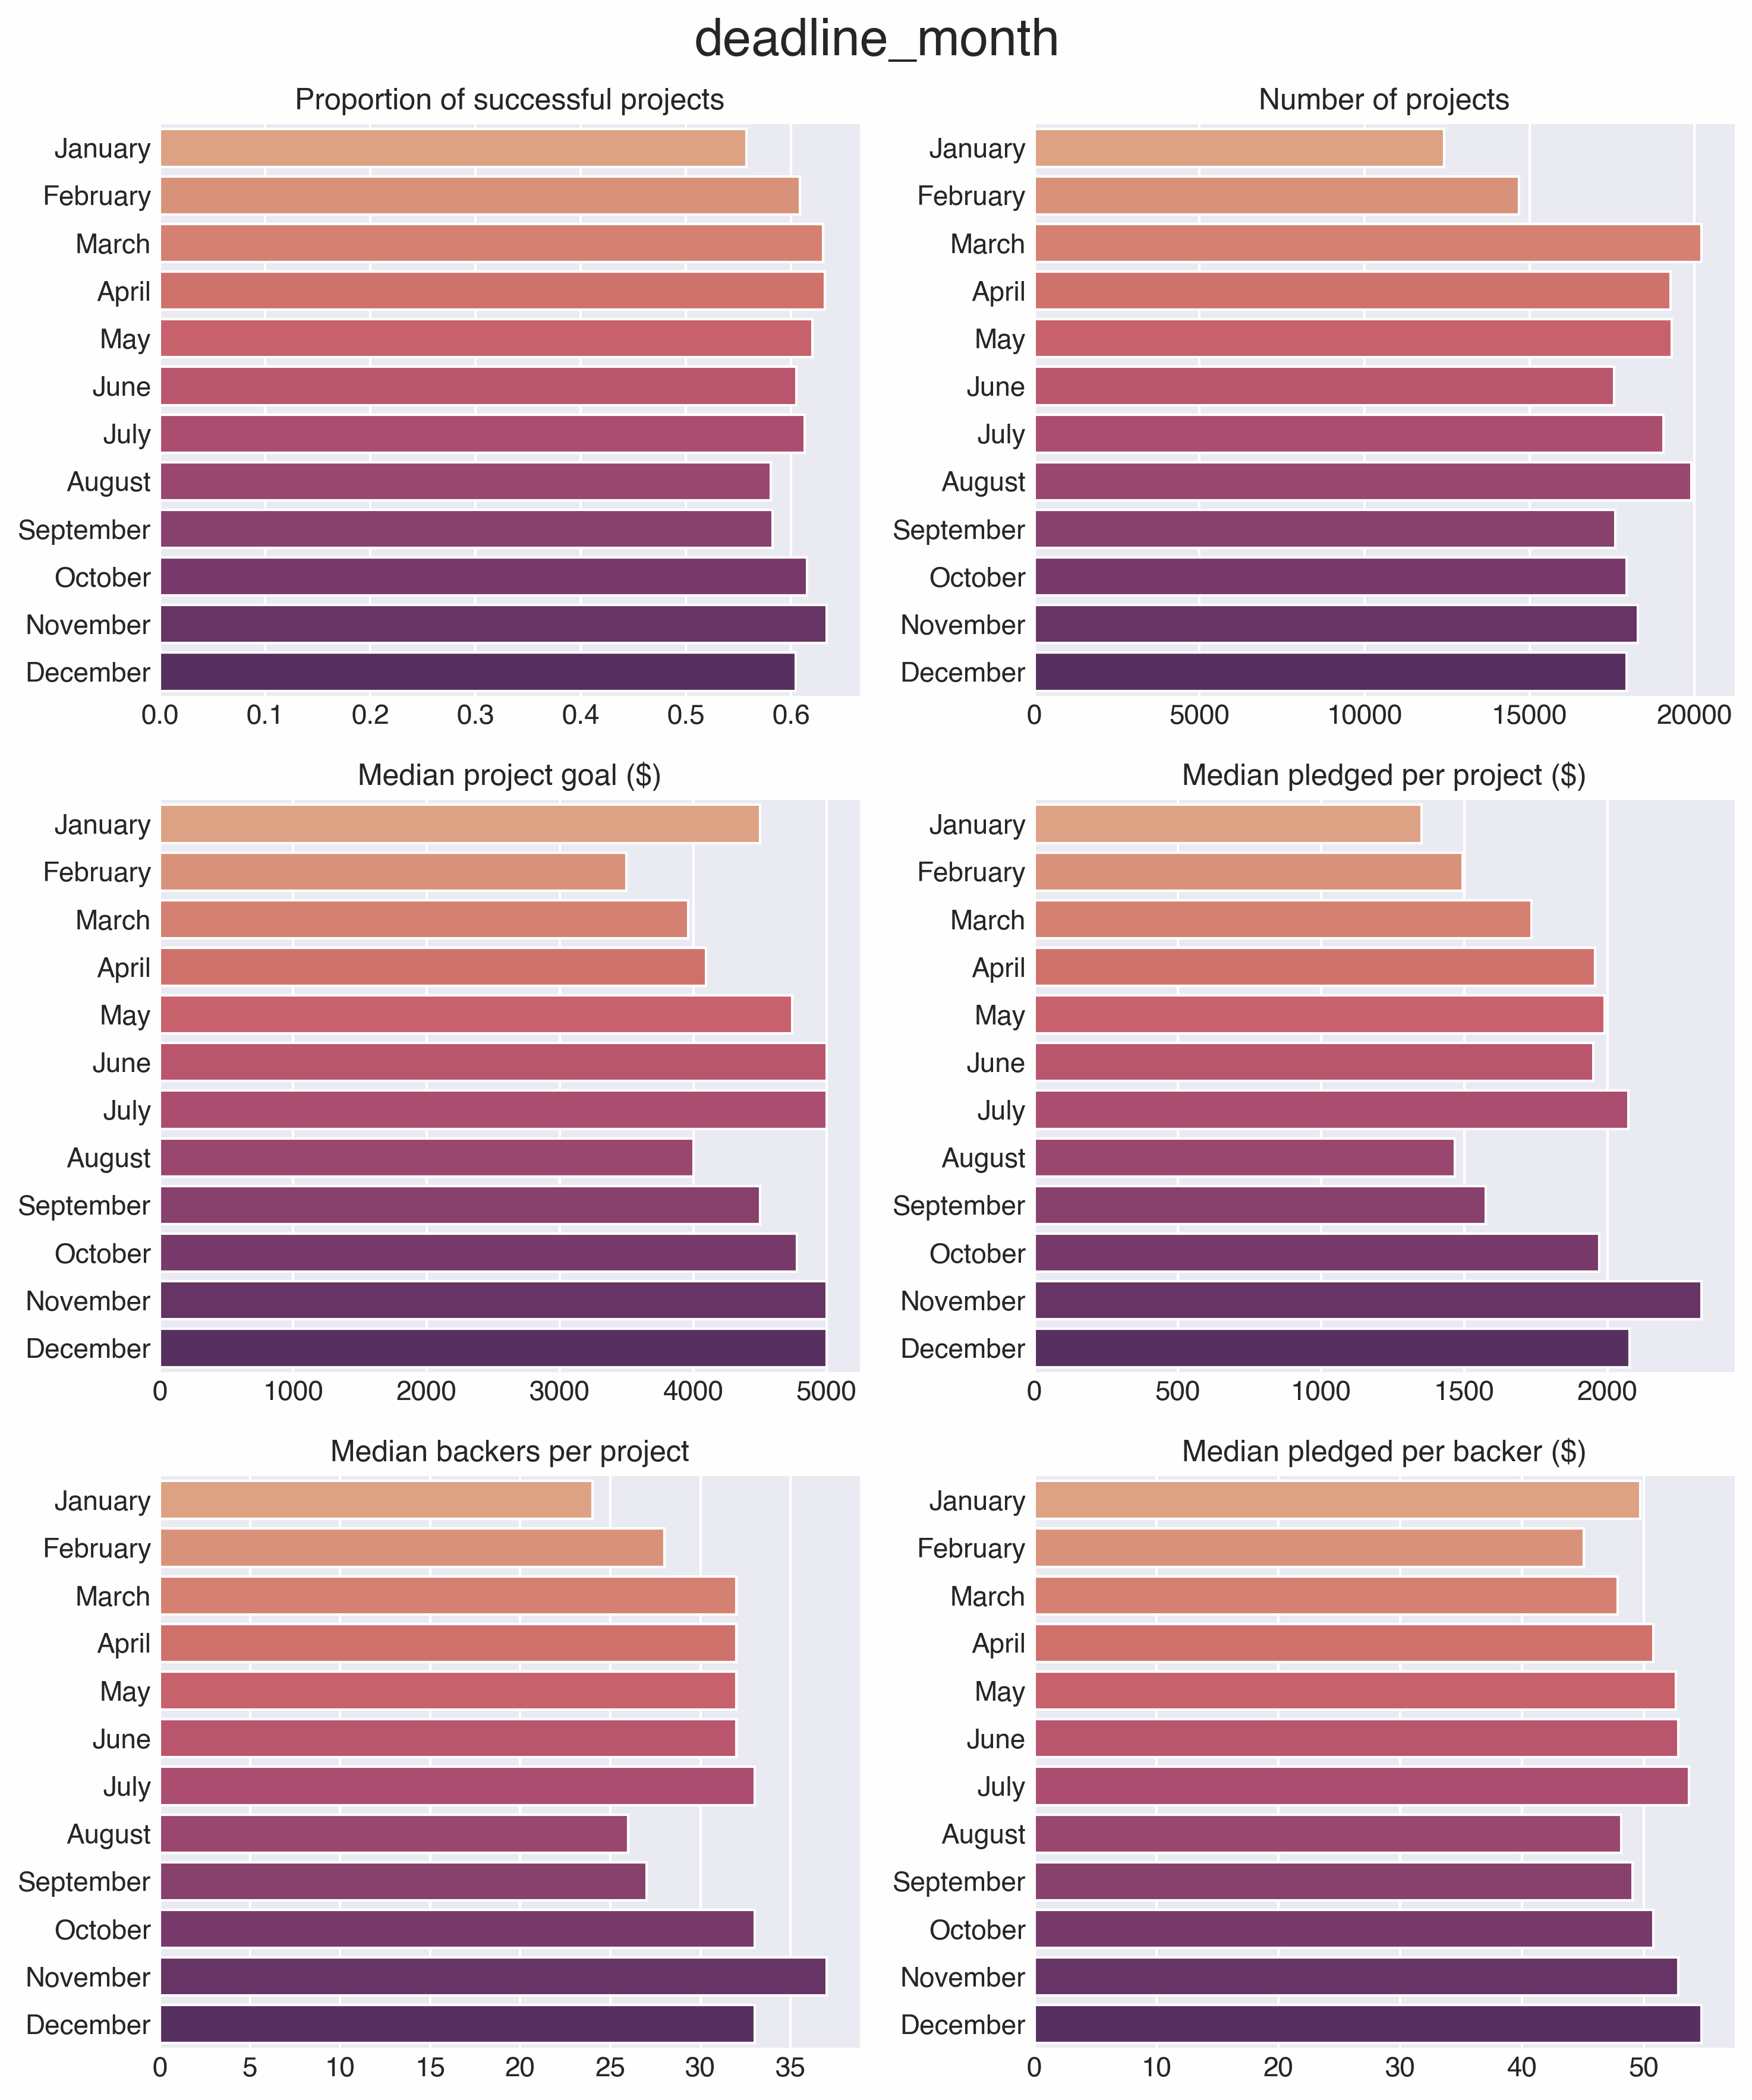

In [11]:
# --- 'deadline month' ---
EDA.bar_by_feature(df, 'deadline_month', doSort=list(calendar.month_name)[1:], palette='flare')

## Correlations

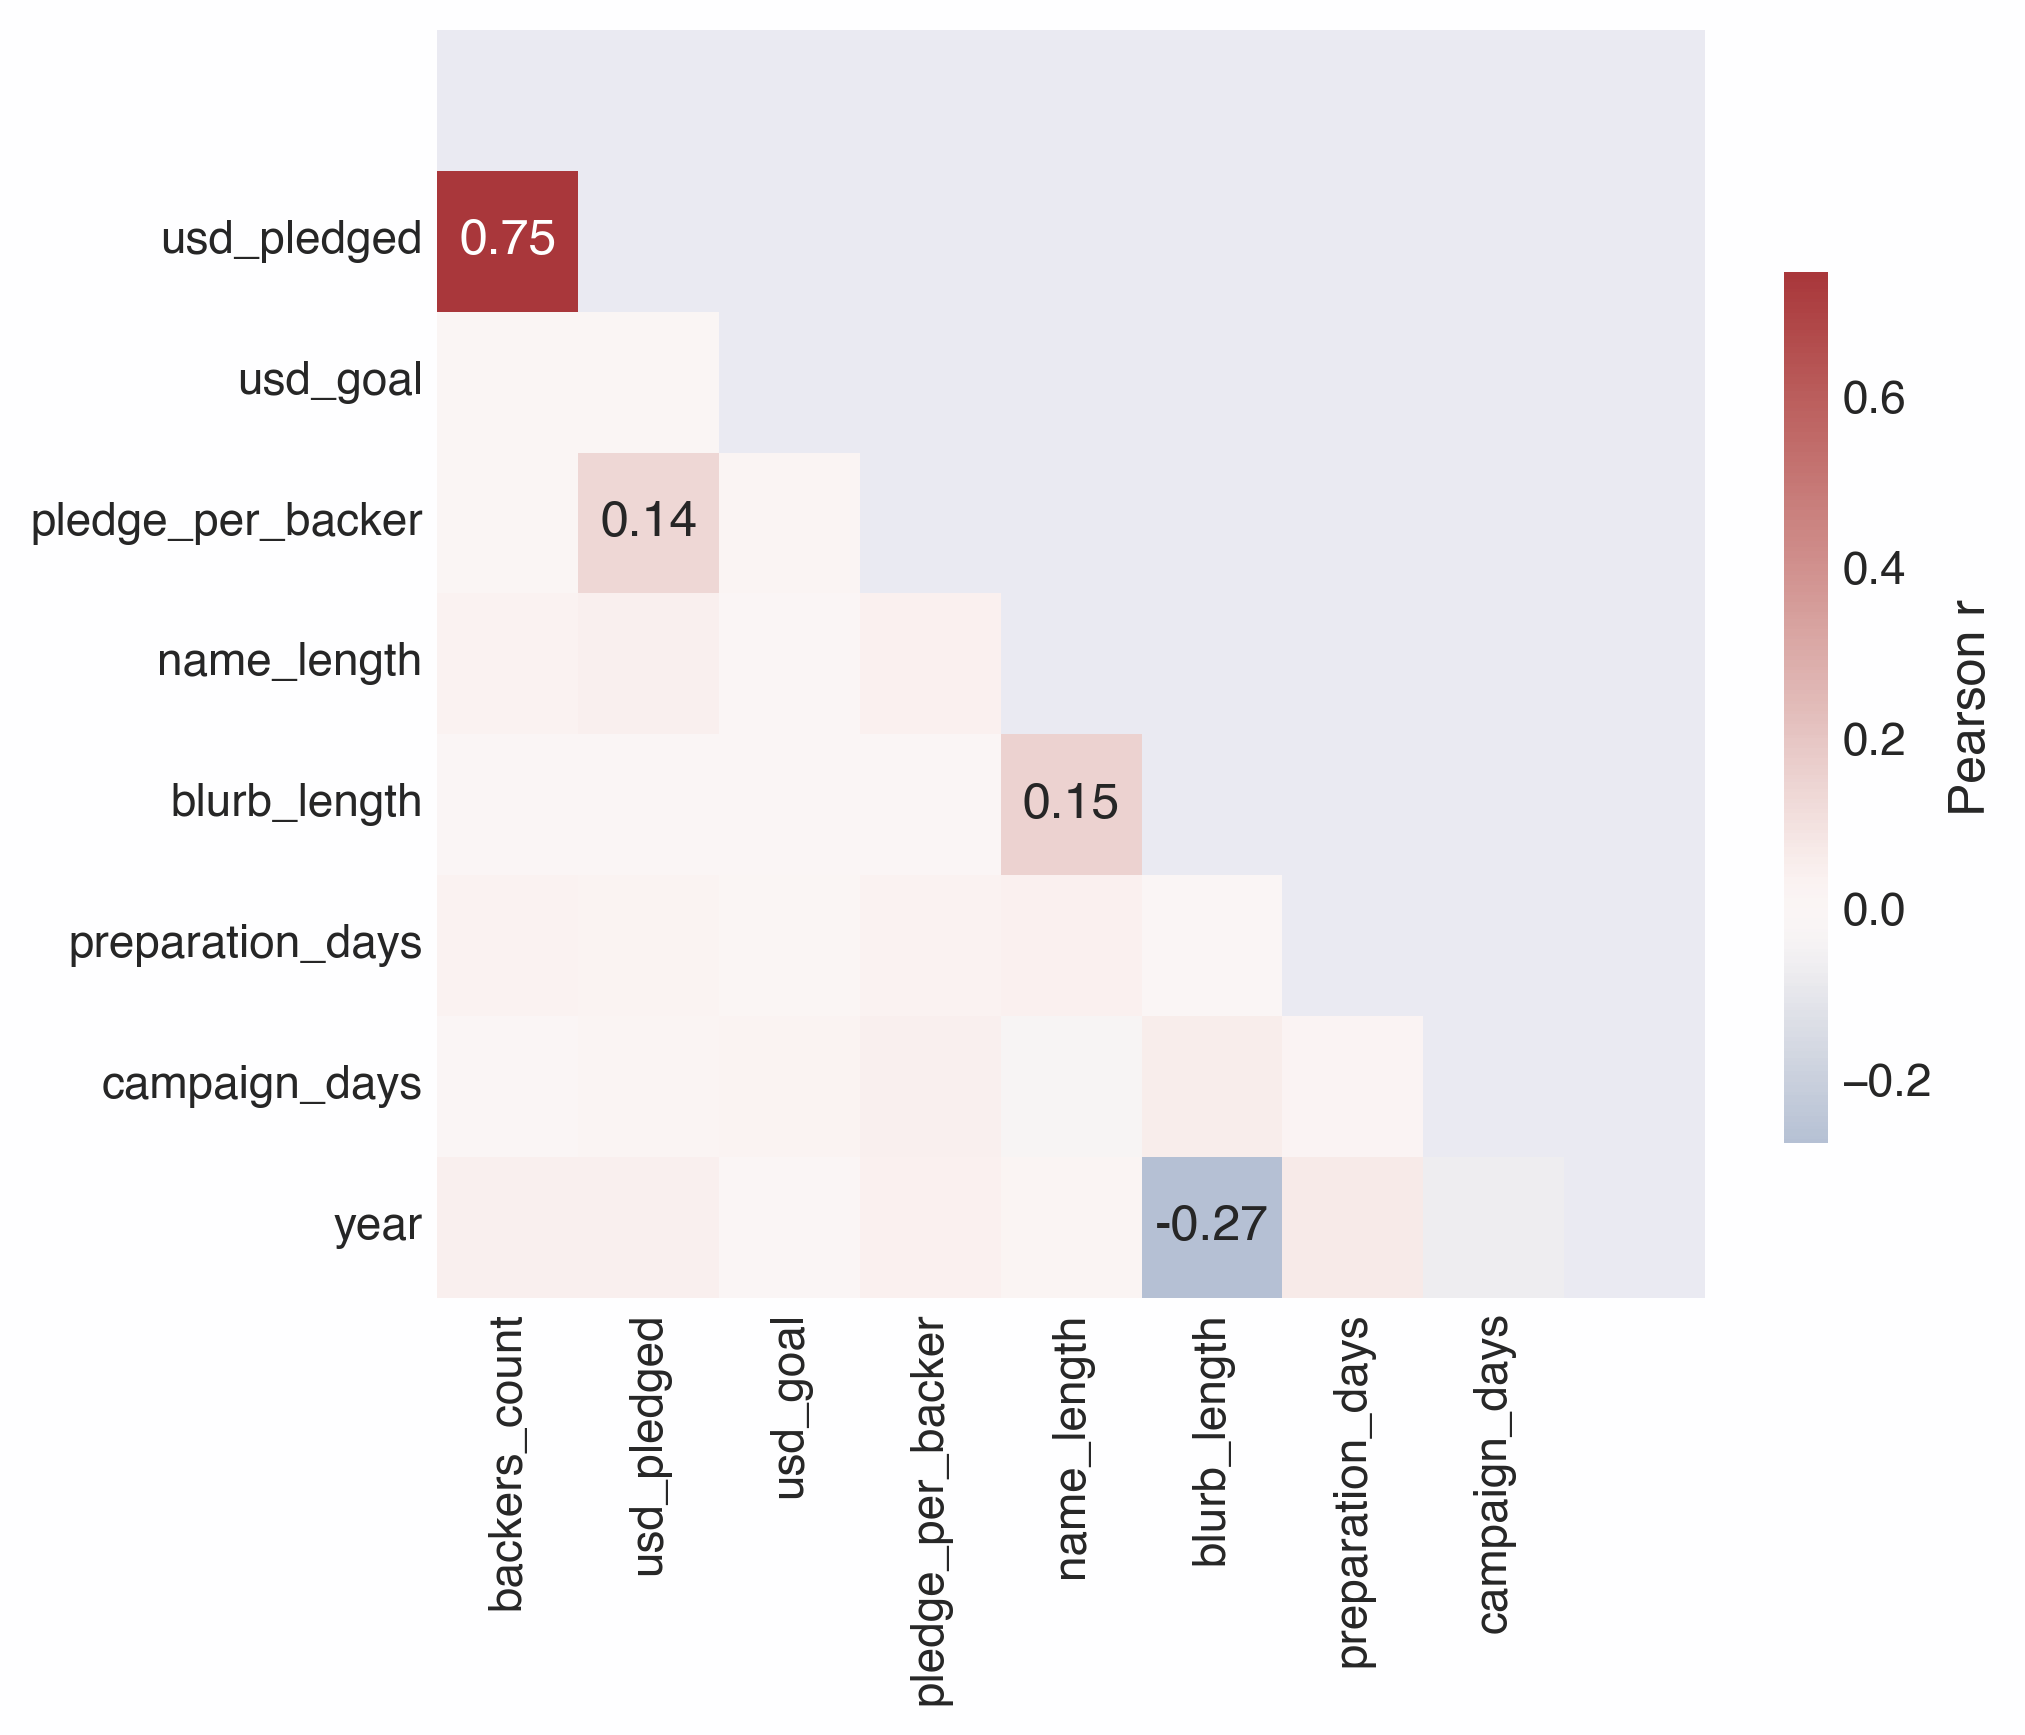

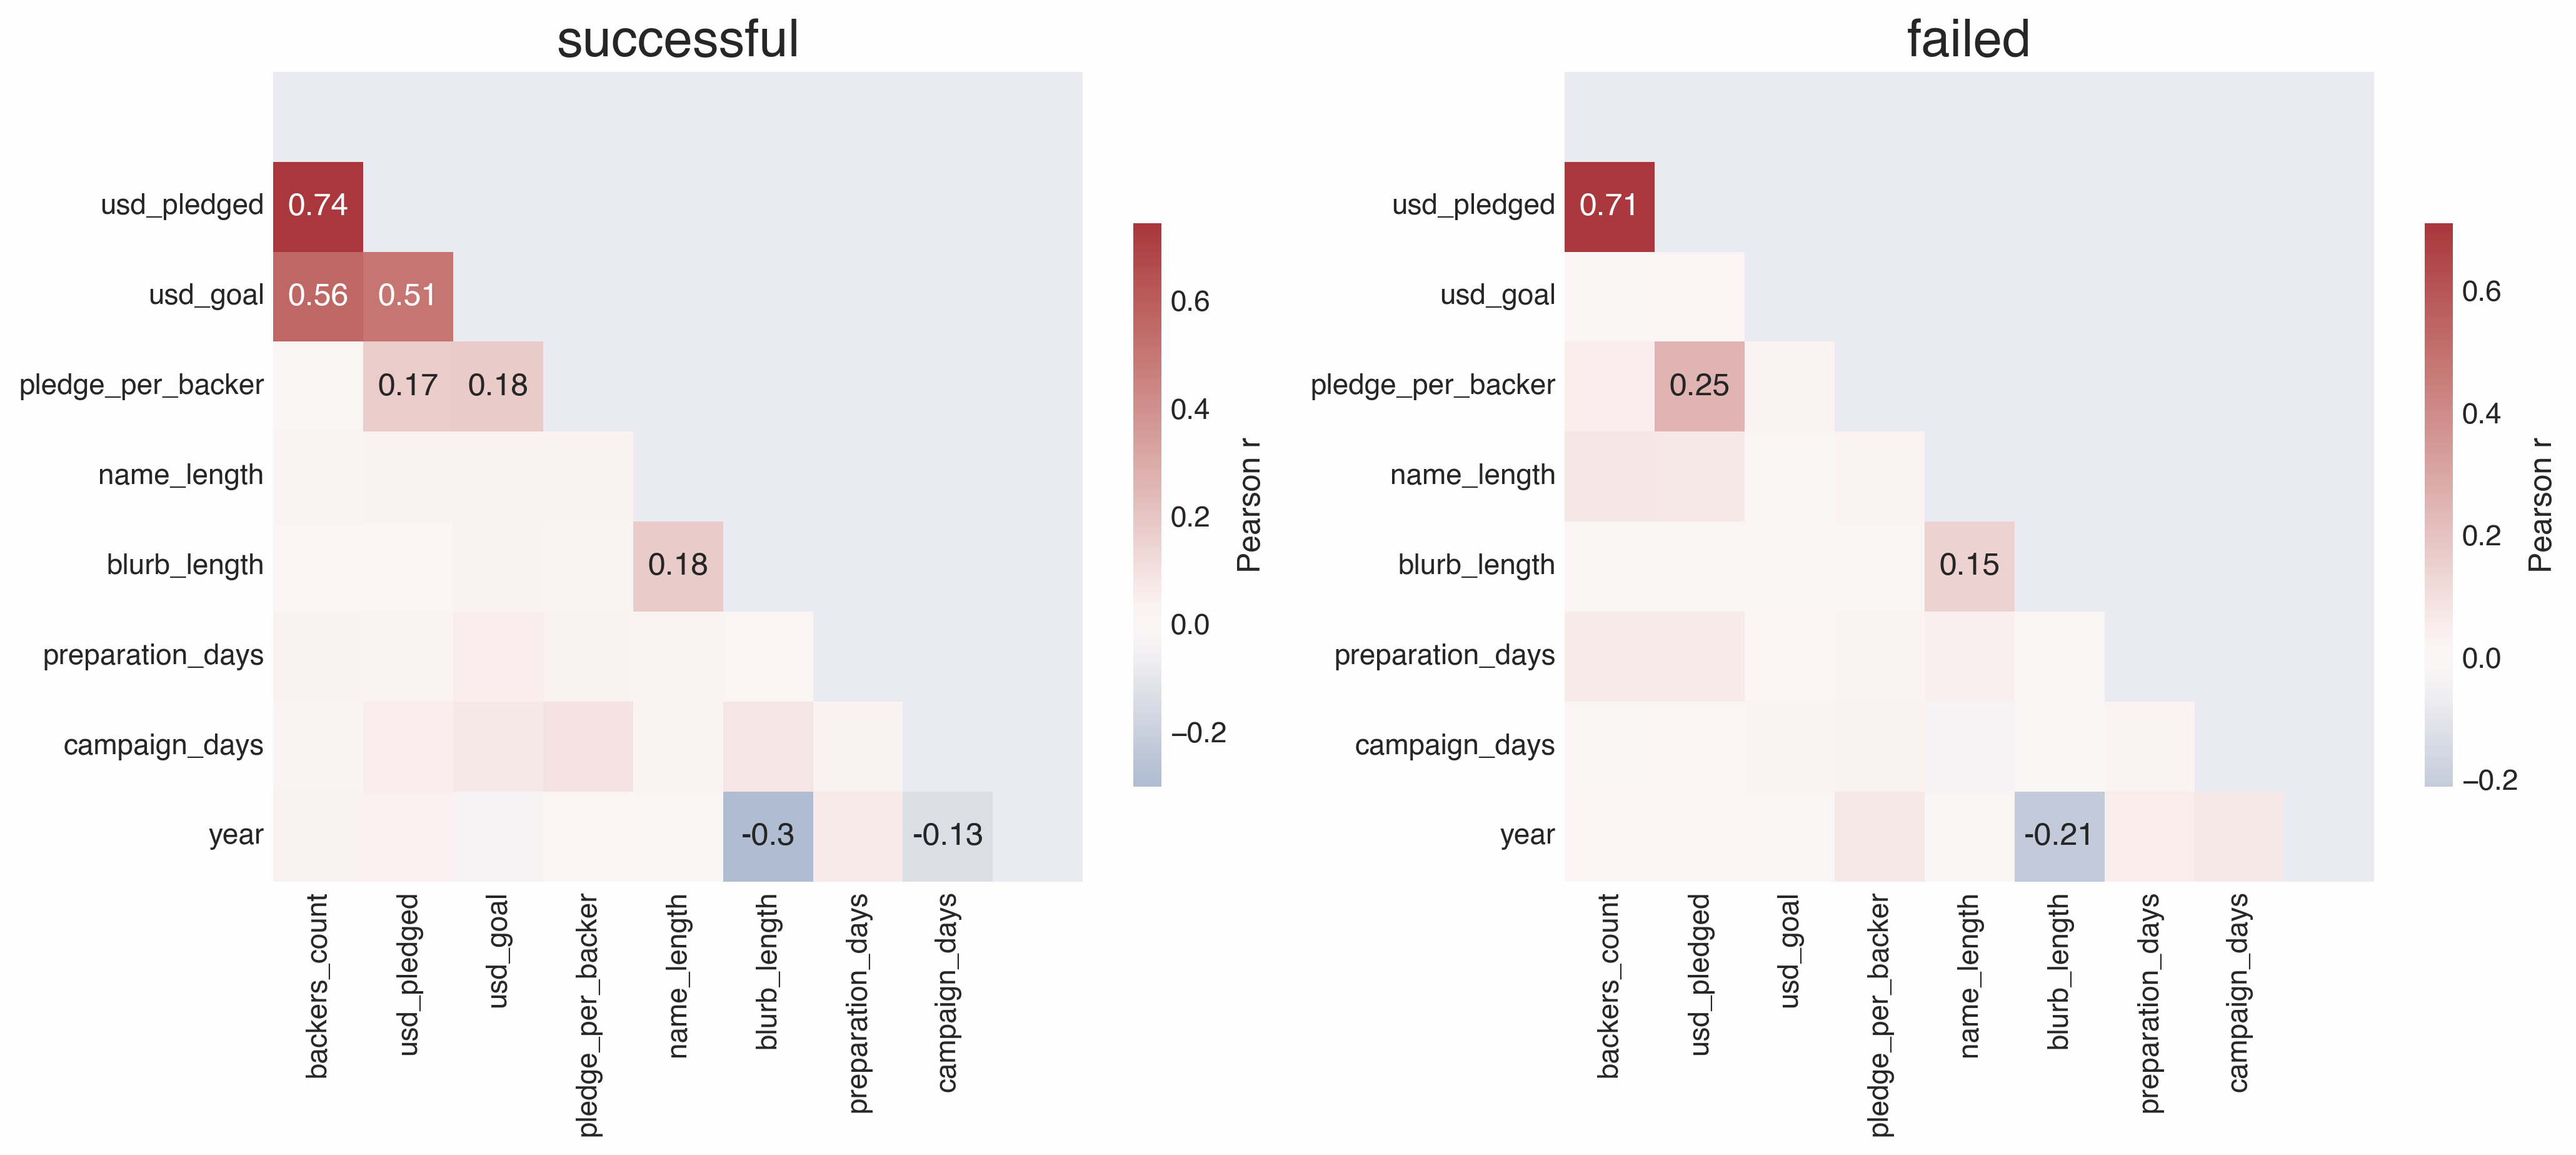

In [12]:
# --- correlation plots ---
EDA.corr_matrix(df, num_feat, thresh=.1)
EDA.corr_matrix(df, num_feat, col='state', thresh=.1)

In [13]:
# # --- pairplot ---
# corr_feat = ['usd_goal', 'name_length', 'blurb_length', 'preparation_days']
# EDA.pairs(df, features=corr_feat, hue='state')